**Neural Networks**  
**EE 258 – Fall 2021**  
**Class Project**  
  

**Classification of flower images**

**This Code contains extension for the project [Towards Extra credit]**

**i. to include other data sources (possibly different data types, for example text) to solve the same problem in order to improve your model**

In [ ]:
# Install and gathering all libraries needed

!pip install split-folders -q
!pip install --upgrade --ignore-installed kaggle -q

import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation,BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from keras.models import model_from_json
from sklearn.preprocessing import LabelBinarizer
import os
from imutils import paths
from tqdm import tqdm
from matplotlib.pyplot import imshow
import splitfolders
from tensorflow.keras.callbacks import EarlyStopping
from urllib.request import urlopen
from zipfile import ZipFile
import shutil 
from keras.models import Sequential

     |████████████████████████████████| 58 kB 3.2 MB/s 
     |████████████████████████████████| 149 kB 8.8 MB/s 
     |████████████████████████████████| 247 kB 54.5 MB/s 
     |████████████████████████████████| 62 kB 847 kB/s 
     |████████████████████████████████| 76 kB 5.1 MB/s 
     |████████████████████████████████| 138 kB 60.2 MB/s 
     |████████████████████████████████| 78 kB 7.5 MB/s 
     |████████████████████████████████| 61 kB 8.2 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
google-colab 1.0.0 requires six~=1.15.0, but you have six 1.16.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incomp

In [ ]:
# Just save the path into variables, this is used to store and access the data after splitting
input_folder="./dataset/originalDataset"
output_folder="./dataset/projectDataset"

In [ ]:
# We are downloading the dataset from our github reop [https://github.com/chyavanphadke/Classification_of_flower_images]
# Firstly the github repo is downloaded as zip,
# Later the zip file is extracted in to project directory and only dataset folder is retained and rest is deleted
# if the dataset folder is already present then we are not downloading the dataset again.

if(os.path.exists("./dataset/projectDataset/train")):
    print("Dataset already Downloaded")
else:
    # Download the dataset zip file from github and extract into local repo
    zipurl = "https://codeload.github.com/chyavanphadke/Classification_of_flower_images/zip/refs/heads/main"
    zipresp = urlopen(zipurl)
    tempzip = open("./tempdatasetdownload.zip", "wb")
    tempzip.write(zipresp.read())
    tempzip.close()
    zf = ZipFile("./tempdatasetdownload.zip")
    zf.extractall(path = './dataset/')
    shutil.copytree("./dataset/Classification_of_flower_images-main/dataset/originalDataset", "./dataset/originalDataset");
    zf.close()
    splitfolders.ratio(input_folder,output=output_folder,seed=42,ratio=(0.7,0.2,0.1),group_prefix=None);
    !rm -rf /content/tempdatasetdownload.zip
    !rm -rf /content/dataset/Classification_of_flower_images-main

Copying files: 4317 files [00:00, 4600.35 files/s]


In [ ]:
# Converting copies of all images into gray scale

import cv2
import glob

for filename in glob.glob(r'/content/dataset/originalDataset/daisy/*.jpg'):
    img=cv2.imread(filename) 
    rl=cv2.resize(img, (64,64))
    gray_image = cv2.cvtColor(rl, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(f'{filename}_gray.jpg', gray_image)
for filename in glob.glob(r'/content/dataset/originalDataset/dandelion/*.jpg'):
    img=cv2.imread(filename) 
    rl=cv2.resize(img, (64,64))
    gray_image = cv2.cvtColor(rl, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(f'{filename}_gray.jpg', gray_image)
for filename in glob.glob(r'/content/dataset/originalDataset/rose/*.jpg'):
    img=cv2.imread(filename) 
    rl=cv2.resize(img, (64,64))
    gray_image = cv2.cvtColor(rl, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(f'{filename}_gray.jpg', gray_image)
for filename in glob.glob(r'/content/dataset/originalDataset/sunflower/*.jpg'):
    img=cv2.imread(filename) 
    rl=cv2.resize(img, (64,64))
    gray_image = cv2.cvtColor(rl, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(f'{filename}_gray.jpg', gray_image)
for filename in glob.glob(r'/content/dataset/originalDataset/tulip/*.jpg'):
    img=cv2.imread(filename) 
    rl=cv2.resize(img, (64,64))
    gray_image = cv2.cvtColor(rl, cv2.COLOR_BGR2GRAY)
    cv2.imwrite(f'{filename}_gray.jpg', gray_image)

In [ ]:
#dataset path
train_path = "./dataset/projectDataset/train"

In [ ]:
# ImageDataGenerator to apply data augmentation, randomly translating, rotating, resizing.

train_datagen = ImageDataGenerator(rescale=1. / 255)
train_datagen.fill_mode='constant'
train_datagen.horizontal_flip=True
train_datagen.zoom_range=[0.8, 1.2]
train_datagen.rotation_range=20
train_datagen.shear_range=10
train_datagen.brightness_range = [0.75, 1.5]

train = train_datagen.flow_from_directory(train_path, target_size=(128,128), class_mode='categorical',shuffle=False)

Found 3019 images belonging to 5 classes.


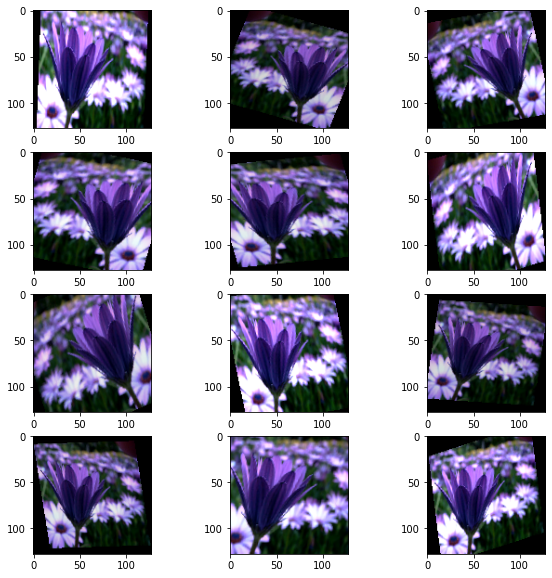

In [ ]:
# Plotting one image after augmentation
fig , axs = plt.subplots(4,3 ,figsize = (10,10))

axs[0][0].imshow(train[1][0][0])
axs[0][1].imshow(train[1][0][0])
axs[0][2].imshow(train[1][0][0])
axs[1][0].imshow(train[1][0][0])
axs[1][1].imshow(train[1][0][0])
axs[1][2].imshow(train[1][0][0])
axs[2][0].imshow(train[1][0][0])
axs[2][1].imshow(train[1][0][0])
axs[2][2].imshow(train[1][0][0])
axs[3][0].imshow(train[1][0][0])
axs[3][1].imshow(train[1][0][0])
axs[3][2].imshow(train[1][0][0])

In [ ]:
# This is the best model
# This is the Custom Model 3 that we discussed in the report

from keras.models import Sequential
model = Sequential()

# first convolutional layer with filters=24, kernal size=5X5, starides=2"
model.add(Conv2D(24, (5, 5), strides=(2,2), padding='same', activation='relu', input_shape=(128, 128, 3)))
# max pooling with filter size=3X3, and starides=2"
model.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))

# second convolutional layer with filters=48, kernal size=5X5"
model.add(Conv2D(48, (5,5), padding='same', activation='relu'))
# max pooling with filter size=3X3, and starides=2"
model.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))

# third convolutional layer with filters=95, kernal size=3X3"
model.add(Conv2D(96, (3,3), padding='same', activation='relu'))
# max pooling with filter size=3X3, and starides=2"
model.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))
# convolutional layer with filters=120, kernal size=3X3"
model.add(Conv2D(120, (3,3), padding='same', activation='relu'))
# max pooling with filter size=3X3, and starides=2"
model.add(MaxPooling2D((3,3), strides=(2,2), padding='same'))

# flatten the input feature map. here it flattens the last feature map before it
model.add(Flatten())
model.add(Dense(384, activation='relu'))
# use softmax activation for classification
model.add(Dense(5, activation='softmax'))

In [ ]:
# printing summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 24)        1824      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 24)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 48)        28848     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 48)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 96)        41568     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 8, 8, 96)         0

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam
sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)

In [ ]:
# compiling model
model.compile(optimizer = sgd , loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
# training our model
# we are using .fit method instead of .fit_generator because we have tensorflow 2.4.0
hist = model.fit(train,batch_size=256,epochs=100)

Epoch 1/100
95/95 [==============================] - 25s 179ms/step - loss: 1.6318 - accuracy: 0.1984
Epoch 2/100
95/95 [==============================] - 17s 179ms/step - loss: 1.6074 - accuracy: 0.2421
Epoch 3/100
95/95 [==============================] - 17s 182ms/step - loss: 1.6058 - accuracy: 0.2421
Epoch 4/100
95/95 [==============================] - 17s 181ms/step - loss: 1.5848 - accuracy: 0.2474
Epoch 5/100
95/95 [==============================] - 17s 179ms/step - loss: 1.5724 - accuracy: 0.2706
Epoch 6/100
95/95 [==============================] - 17s 180ms/step - loss: 1.4995 - accuracy: 0.3627
Epoch 7/100
95/95 [==============================] - 17s 179ms/step - loss: 1.4182 - accuracy: 0.3756
Epoch 8/100
95/95 [==============================] - 17s 179ms/step - loss: 1.3343 - accuracy: 0.4048
Epoch 9/100
95/95 [==============================] - 17s 179ms/step - loss: 1.3523 - accuracy: 0.3972
Epoch 10/100
95/95 [==============================] - 17s 183ms/step - loss: 1.261

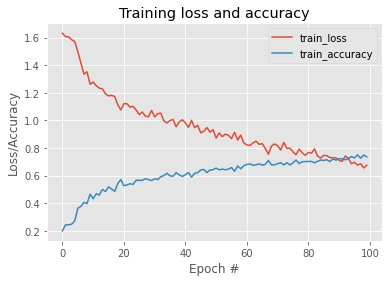

In [ ]:
import matplotlib.pyplot as plt
N = np.arange(0, 100)
plt.style.use('ggplot')
plt.figure()
plt.plot(N, hist.history['loss'], label='train_loss')
plt.plot(N, hist.history['accuracy'], label='train_accuracy')
plt.title('Training loss and accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

In [ ]:
# loading validation data
path_test = "/content/dataset/projectDataset/train"
test_datagen = ImageDataGenerator(rescale=1. / 255)
test = test_datagen.flow_from_directory(path_test, target_size=(128,128), class_mode='categorical',shuffle=False)

Found 3019 images belonging to 5 classes.


In [ ]:
test_steps_per_epoch = np.math.ceil(test.samples / test.batch_size)

predictions = model.predict(test, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
true_classes = test.classes
class_labels = list(test.class_indices.keys())


In [ ]:
# checking cross validation accuracy/test accuracy
preds = model.evaluate(test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

95/95 [==============================] - 7s 73ms/step - loss: 0.6653 - accuracy: 0.7469
Loss = 0.6652746796607971
Test Accuracy = 0.7469360828399658


In [ ]:
import sklearn.metrics as metrics

In [ ]:
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

       daisy       0.88      0.72      0.79       534
   dandelion       0.82      0.77      0.79       736
        rose       0.81      0.50      0.62       548
   sunflower       0.62      0.97      0.76       513
       tulip       0.70      0.78      0.74       688

    accuracy                           0.75      3019
   macro avg       0.77      0.75      0.74      3019
weighted avg       0.77      0.75      0.74      3019



In [ ]:
# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

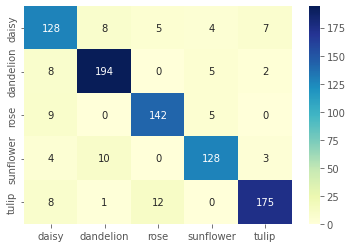

In [ ]:
import seaborn as sns
class_names=["daisy","dandelion","rose","sunflower","tulip"]
sns.heatmap(confusion_mtx, xticklabels=class_names, yticklabels=class_names, annot=True, fmt='d', cmap="YlGnBu")

In [ ]:
# loading prediction data

path_pred = "/content/dataset/projectDataset/train"
predict_datagen = ImageDataGenerator(rescale=1. / 255)
predict = predict_datagen.flow_from_directory(path_pred, target_size=(128,128),class_mode='categorical',shuffle=False)

Found 3019 images belonging to 5 classes.


In [ ]:
predictions = model.predict(predict)

In [ ]:
def get_category(predicted_output):
    path1 ="/content/dataset/projectDataset/train"
    return os.listdir(path1)[np.argmax(predicted_output)]

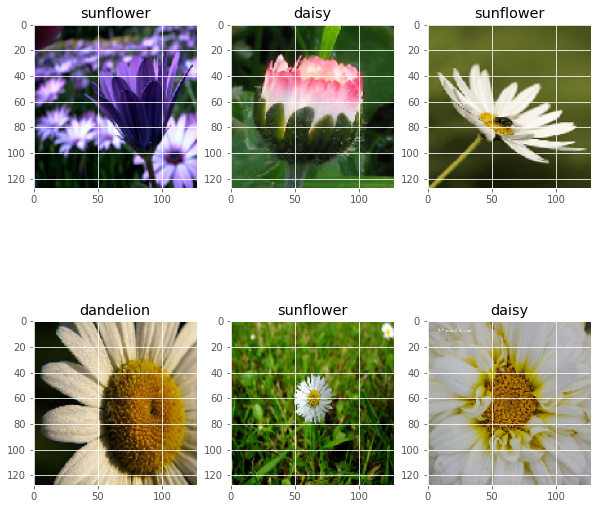

In [ ]:
fig , axs = plt.subplots(2,3 ,figsize = (10,10))

axs[0][0].imshow(predict[1][0][0])
axs[0][0].set_title(get_category(predictions[1]))
axs[0][1].imshow(predict[2][0][0])
axs[0][1].set_title(get_category(predictions[2]))
axs[0][2].imshow(predict[3][0][0])
axs[0][2].set_title(get_category(predictions[3]))
axs[1][0].imshow(predict[4][0][0])
axs[1][0].set_title(get_category(predictions[4]))
axs[1][1].imshow(predict[5][0][0])
axs[1][1].set_title(get_category(predictions[5]))
axs[1][2].imshow(predict[6][0][0])
axs[1][2].set_title(get_category(predictions[6]))


plt.show()

**ii. solving other ML problems using the same dataset and making joint decisions**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logisticRegr = LogisticRegression()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 
import os 
from random import shuffle 
from tqdm import tqdm 
from PIL import Image

In [ ]:
train_daisy = "/content/dataset/projectDataset/train/daisy"
train_dandelion = "/content/dataset/projectDataset/train/dandelion"
train_rose = "/content/dataset/projectDataset/train/rose"
train_sunflower = "/content/dataset/projectDataset/train/sunflower"
train_tulip = "/content/dataset/projectDataset/train/tulip"
test_daisy = "/content/dataset/projectDataset/test/daisy"
test_dandelion = "/content/dataset/projectDataset/test/dandelion"
test_rose = "/content/dataset/projectDataset/test/rose"
test_sunflower = "/content/dataset/projectDataset/test/sunflower"
test_tulip = "/content/dataset/projectDataset/test/tulip"
image_size = 128

100%|██████████| 688/688 [00:00<00:00, 857.23it/s]


Text(0.5, 1.0, 'Daisy and Dandelion in GrayScale')

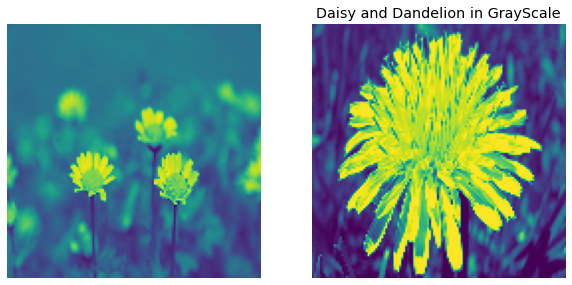

In [ ]:
for image in tqdm(os.listdir(train_daisy)): 
    path = os.path.join(train_daisy, image)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img = cv2.resize(img, (image_size, image_size)).flatten()   
    np_img=np.asarray(img)
    
for image2 in tqdm(os.listdir(train_dandelion)): 
    path = os.path.join(train_dandelion, image2)
    img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img2 = cv2.resize(img2, (image_size, image_size)).flatten() 
    np_img2=np.asarray(img2)

for image3 in tqdm(os.listdir(train_rose)): 
    path = os.path.join(train_rose, image3)
    img3 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img3 = cv2.resize(img3, (image_size, image_size)).flatten() 
    np_img3=np.asarray(img3)

for image4 in tqdm(os.listdir(train_sunflower)): 
    path = os.path.join(train_sunflower, image4)
    img4 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img4 = cv2.resize(img4, (image_size, image_size)).flatten() 
    np_img4=np.asarray(img4)    

for image5 in tqdm(os.listdir(train_tulip)): 
    path = os.path.join(train_tulip, image5)
    img5 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
    img5 = cv2.resize(img5, (image_size, image_size)).flatten() 
    np_img5=np.asarray(img5)  

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(np_img.reshape(image_size, image_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(np_img2.reshape(image_size, image_size))
plt.axis('off')
plt.title("Daisy and Dandelion in GrayScale")


In [ ]:
def train_data():
    train_data_daisy = [] 
    train_data_dandelion = []
    train_data_rose = []
    train_data_sunflower = []
    train_data_tulip = []
    for image1 in tqdm(os.listdir(train_daisy)): 
        path = os.path.join(train_daisy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        train_data_daisy.append(img1) 
    for image2 in tqdm(os.listdir(train_dandelion)): 
        path = os.path.join(train_dandelion, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        train_data_dandelion.append(img2) 
    for image3 in tqdm(os.listdir(train_rose)):
        path = os.path.join(train_rose, image3)
        img3 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img3 = cv2.resize(img3, (image_size, image_size))
        train_data_rose.append(img3)
    for image4 in tqdm(os.listdir(train_sunflower)):
        path = os.path.join(train_sunflower, image4)
        img4 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img4 = cv2.resize(img4, (image_size, image_size))
        train_data_sunflower.append(img4)        
    for image5 in tqdm(os.listdir(train_tulip)):
        path = os.path.join(train_tulip, image5)
        img5 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img5 = cv2.resize(img5, (image_size, image_size))
        train_data_tulip.append(img5)

    train_data= np.concatenate((np.asarray(train_data_daisy),np.asarray(train_data_dandelion),np.asarray(train_data_rose),np.asarray(train_data_sunflower),np.asarray(train_data_tulip)),axis=0)
    return train_data 

In [ ]:
def test_data():
    test_data_daisy = [] 
    test_data_dandelion = []
    test_data_rose = []
    test_data_sunflower = []
    test_data_tulip = []
    for image1 in tqdm(os.listdir(test_daisy)): 
        path = os.path.join(test_daisy, image1)
        img1 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img1 = cv2.resize(img1, (image_size, image_size))
        test_data_daisy.append(img1) 
    for image2 in tqdm(os.listdir(test_dandelion)): 
        path = os.path.join(test_dandelion, image2)
        img2 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img2 = cv2.resize(img2, (image_size, image_size))
        test_data_dandelion.append(img2) 
    for image3 in tqdm(os.listdir(test_rose)):
        path = os.path.join(test_rose, image3)
        img3 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img3 = cv2.resize(img3, (image_size, image_size))
        test_data_rose.append(img3)
    for image4 in tqdm(os.listdir(test_sunflower)):
        path = os.path.join(test_sunflower, image4)
        img4 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img4 = cv2.resize(img4, (image_size, image_size))
        test_data_sunflower.append(img4)        
    for image5 in tqdm(os.listdir(test_tulip)):
        path = os.path.join(test_tulip, image5)
        img5 = cv2.imread(path, cv2.IMREAD_GRAYSCALE) 
        img5 = cv2.resize(img5, (image_size, image_size))
        test_data_tulip.append(img5)

    test_data= np.concatenate((np.asarray(test_data_daisy),np.asarray(test_data_dandelion),np.asarray(test_data_rose),np.asarray(test_data_sunflower),np.asarray(test_data_tulip)),axis=0)
    return test_data 

In [ ]:
# train_data and test_data function call

train_data = train_data() 
test_data = test_data()

100%|██████████| 100/100 [00:00<00:00, 918.14it/s]


In [ ]:
x_data=np.concatenate((train_data,test_data),axis=0)
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [ ]:
d1 = np.zeros(534)
da1 = np.ones(736)
r1 = np.zeros(548)
s1 = np.ones(513)
t1= np.zeros(688)
Y_train = np.concatenate((d1, da1, r1, s1, t1), axis=0)
d = np.zeros(78)
da = np.ones(106)
r = np.zeros(80)
s = np.ones(74)
t = np.zeros(100)
Y_test = np.concatenate((d, da, r, s, t), axis=0)

In [ ]:
y_data=np.concatenate((Y_train,Y_test),axis=0).reshape(x_data.shape[0],1)

In [ ]:
print("X shape: " , x_data.shape)
print("Y shape: " , y_data.shape)

X shape:  (3457, 128, 128)
Y shape:  (3457, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=42)
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

In [ ]:
x_train_flatten = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flatten = x_test .reshape(number_of_test,x_test.shape[1]*x_test.shape[2])
print("X train flatten",x_train_flatten.shape)
print("X test flatten",x_test_flatten.shape)

X train flatten (2938, 16384)
X test flatten (519, 16384)


In [ ]:
# We are just printing the dataset shape here

x_train = x_train_flatten.T
x_test = x_test_flatten.T
y_test = y_test.T
y_train = y_train.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (16384, 2938)
x test:  (16384, 519)
y train:  (1, 2938)
y test:  (1, 519)


In [ ]:
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

# update function deification

def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    for i in range(number_of_iterarion):
        
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 100 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

# predict function defincation
def predict(w,b,x_test):
    
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

# Function decleration of logistic_regression
# After all itteration we are printing Test Accuracy and Train Accuracy
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):

    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)

    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    print("Test Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,2)))
    print("Train Accuracy: {} %".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,2)))

Cost after iteration 0: nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in multiply
  


Cost after iteration 100: 0.937599
Cost after iteration 200: 1.080007
Cost after iteration 300: 0.994158
Cost after iteration 400: 1.047902
Cost after iteration 500: 1.077403
Cost after iteration 600: 1.104958
Cost after iteration 700: 1.131876
Cost after iteration 800: 1.159155
Cost after iteration 900: 1.187747
Cost after iteration 1000: 1.218707
Cost after iteration 1100: 1.253380
Cost after iteration 1200: 1.293724
Cost after iteration 1300: 1.342816
Cost after iteration 1400: 1.404479
Cost after iteration 1500: 1.473580
Cost after iteration 1600: 1.518225
Cost after iteration 1700: 1.532533
Cost after iteration 1800: 1.539798
Cost after iteration 1900: 1.546301
Cost after iteration 2000: 1.552337
Cost after iteration 2100: 1.557870
Cost after iteration 2200: 1.562880
Cost after iteration 2300: 1.567350
Cost after iteration 2400: 1.571270
Cost after iteration 2500: 1.574628
Cost after iteration 2600: 1.577414
Cost after iteration 2700: 1.579622
Cost after iteration 2800: 1.581248
C

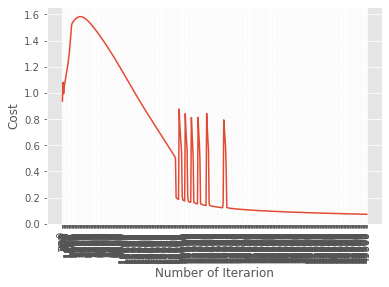

Test Accuracy: 52.79 %
Train Accuracy: 99.46 %


In [ ]:
# logistic_regression function call, parameters are 
# x_train, y_train
# x_test, y_test
# learning_rate = 0.01
# num_iterations = 50000

logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 0.01, num_iterations = 50000)